In [1]:
#Imports
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def load_csv(filename):
    valores = read_csv (filename, header=None).to_numpy()
    return valores.astype(float)

In [3]:
def h(x, theta):
    return theta[0] + theta[1] * x

In [4]:
def cost_function(X, Y, theta):
    sum = 0
    m = len(X)
    sum = np.sum((h(X, theta) - Y) ** 2)
    return sum / (2 * m)

In [5]:
def lineal_regresion_one_variable():
    data = load_csv('ex1data1.csv')
    
    #Primera Columna
    X = data[:,0]
    #Segunda Columna
    Y = data[:,1]
    
    # Numero de ejemplos de entrenamiento
    m = len(X)
    #Tamanho inicial de los saltos
    alpha = 0.01
    #Inicializacion de los valores de theta0 y theta1
    theta0 = theta1 = 0
    
    #Codigo del profesor
    #for _ in range(1500):
    #    sum_0 = sum_1 = 0
    #    for i in range(m):
    #        sum_0 += (theta0 + theta1 * X[i]) - Y[i]
    #        sum_1 += ((theta0 + theta1 * X[i]) - Y[i]) * X[i]
    #    theta0 = theta0 - (alpha/m) * sum_0
    #    theta1 = theta1 - (alpha/m) * sum_1
    
    for _ in range(1500):
        sum_0 = np.sum(h(X, [theta0, theta1]) - Y)
        sum_1 = np.sum((h(X, [theta0, theta1]) - Y) * X)
        theta0 = theta0 - (alpha/m) * sum_0
        theta1 = theta1 - (alpha/m) * sum_1
        
    plt.plot(X, Y, "x")
    min_x = min(X)
    max_x = max(X)
    min_y = theta0 + theta1 * min_x
    max_y = theta0 + theta1 * max_x
    plt.plot([min_x, max_x], [min_y, max_y], color='red', linewidth=2)
    plt.savefig("result1.pdf")
    plt.show
        
    

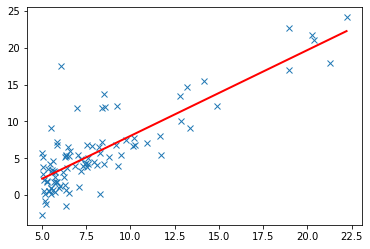

In [6]:
lineal_regresion_one_variable()

In [7]:
def make_data(t0_range, t1_range, X, Y, step=0.1):
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)

    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)

    Coste = np.empty_like(Theta0)
    #TODO comprobar si se puede mejorar este bucle
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = cost_function(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])

    return [Theta0, Theta1, Coste]

In [8]:
def show_contour(data):
    plt.contour(data[0],data[1],data[2],np.logspace(-2,3,20),colors='blue')
    plt.savefig("part1_contour.png")

In [30]:
def show_mesh(data):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(data[0], data[1], data[2], cmap=cm.jet, linewidth=0, antialiased=False)
    plt.show()
    plt.savefig("part1_mesh.png")

In [31]:
def print_contour():
    data = load_csv('ex1data1.csv')
    X = data[:, 0]
    Y = data[:, 1]
    grid_data = make_data([-10, 10], [-1, 4], X, Y)
    # show_mesh(grid_data)
    show_contour(grid_data)
    show_mesh(grid_data)

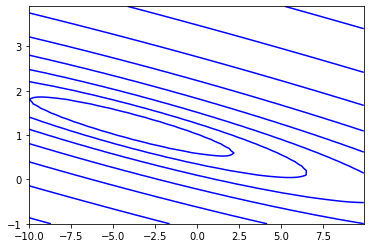

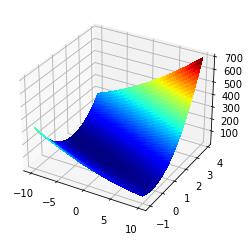

<Figure size 432x288 with 0 Axes>

In [32]:
print_contour()